## 3 diverse problem statements to explore different perspectives:

- Employee Attrition Analysis: To understand and predict attrition rates.
- Employee Satisfaction and Retention: To improve satisfaction and retention.
- Performance and Compensation: To analyze if compensation aligns with performance.


In [101]:
prob1=combined_df.copy()

- My Target Company has 3 departments , I will first analyse the effects of categorical and numerical varibles on attrition rate , department wise.
- Attrition Rate = (Total number of "Yes" / total number of rows)

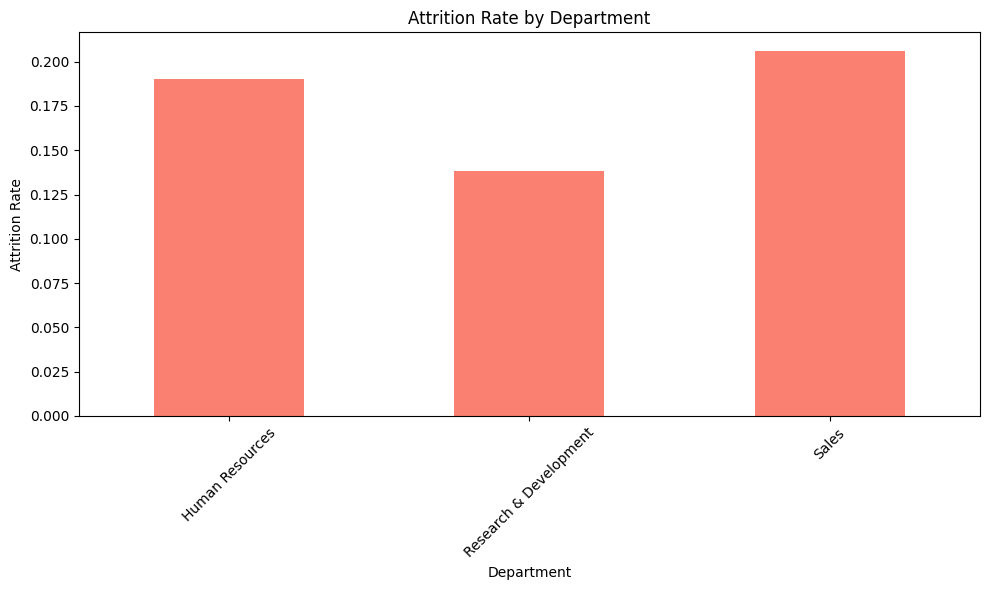

,0
department,
Human Resources,0.190476
Research & Development,0.138398
Sales,0.206278


In [104]:
# Group by department and count the values of 'attrition'
attrition_counts = prob1.groupby('department')['attrition'].value_counts()

# Calculate the total number of 'Yes' and 'No' per department
total_per_department = prob1.groupby('department')['attrition'].count()

# Get the number of 'Yes' per department
yes_per_department = attrition_counts.unstack(fill_value=0)['Yes']

# Calculate the attrition rate
attrition_rate = yes_per_department / total_per_department

# Plot the attrition rate by department
attrition_rate.plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
attrition_rate


- In conclusion, the attrition rates across different departments reveal noticeable variations.
- Sales department has the highest attrition rate at 20.63%, followed by the Human Resources department at 19.05%, and the Research & Development department at 13.84%. 
- These figures suggest that the Sales department may face challenges in employee retention.
- Research & Development has  a lower attrition rate, suggesting a more stable workforce. 
- I will analyse what factors lead to these differences
- Is there anything sales/HR can incoprate from Research and development?

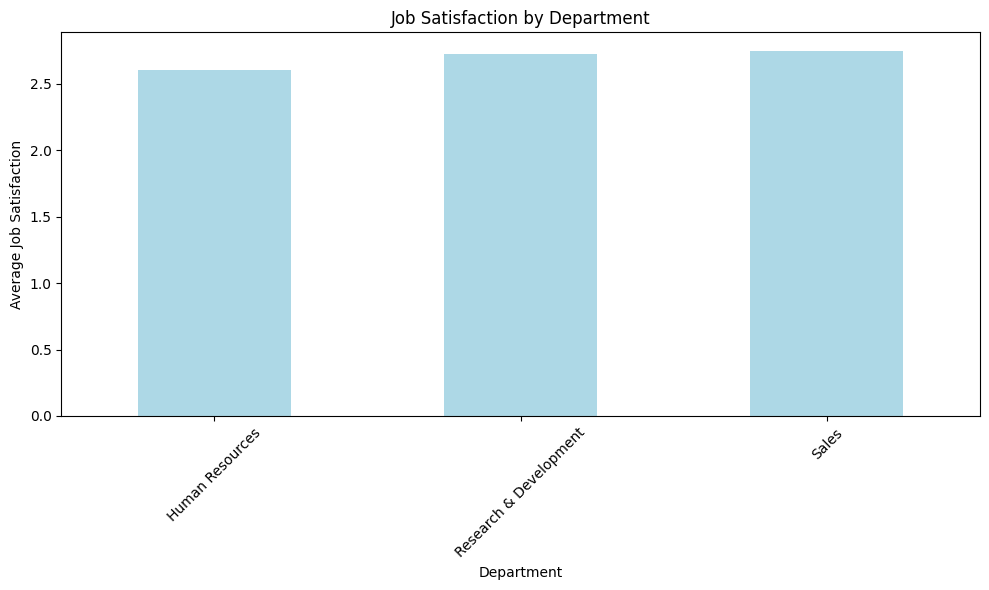

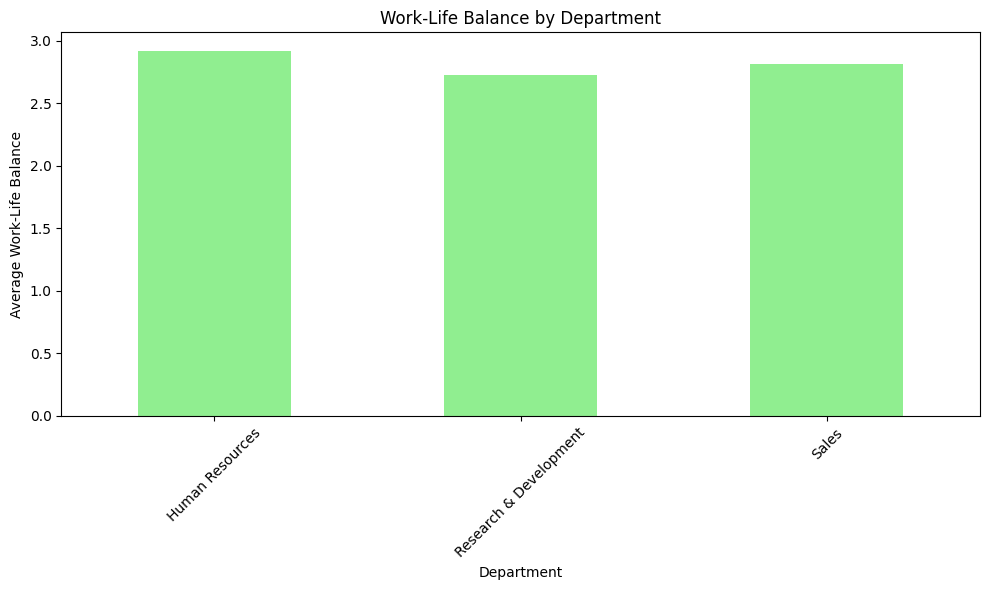

In [105]:
job_satisfaction_by_dept = prob1.groupby('department')['jobsatisfaction'].mean()

# Plotting job satisfaction by department
job_satisfaction_by_dept.plot(kind='bar', figsize=(10, 6), color='lightblue')
plt.title('Job Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

work_life_balance_by_dept = prob1.groupby('department')['worklifebalance'].mean()
work_life_balance_by_dept.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Work-Life Balance by Department')
plt.xlabel('Department')
plt.ylabel('Average Work-Life Balance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [108]:
# Compare overtime status by department
# Group the data by department and calculate the overtime rate
overtime_rate_by_dept = prob1.groupby('department').apply(
    lambda x: (x['overtime'] == 'Yes').sum() / len(x)
).reset_index(name='overtime_rate')

# Display the overtime rate by department
print(overtime_rate_by_dept)


               department  overtime_rate
0         Human Resources       0.269841
1  Research & Development       0.281998
2                   Sales       0.286996


<ipython-input-108-015c78b9997e>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  overtime_rate_by_dept = prob1.groupby('department').apply(


- it is reasonable to suggest that the factors of job satisfaction, work-life balance, and overtime rate seem to play less importance in relation to the attrition rates across the departments as the differences are minimal 
- There may be other factors such as career growth oppurtunities , Team and external trends... Lets explore these


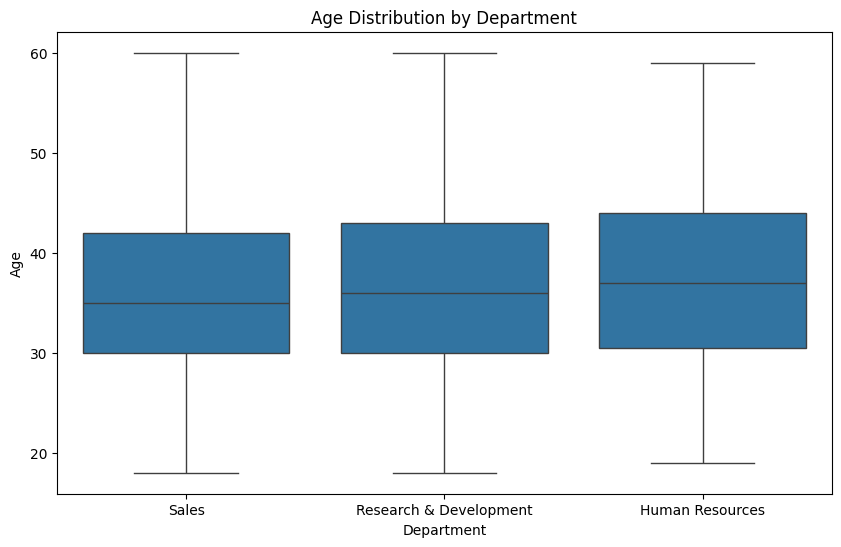

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='age', data=prob1)
plt.title('Age Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Age')
plt.show()

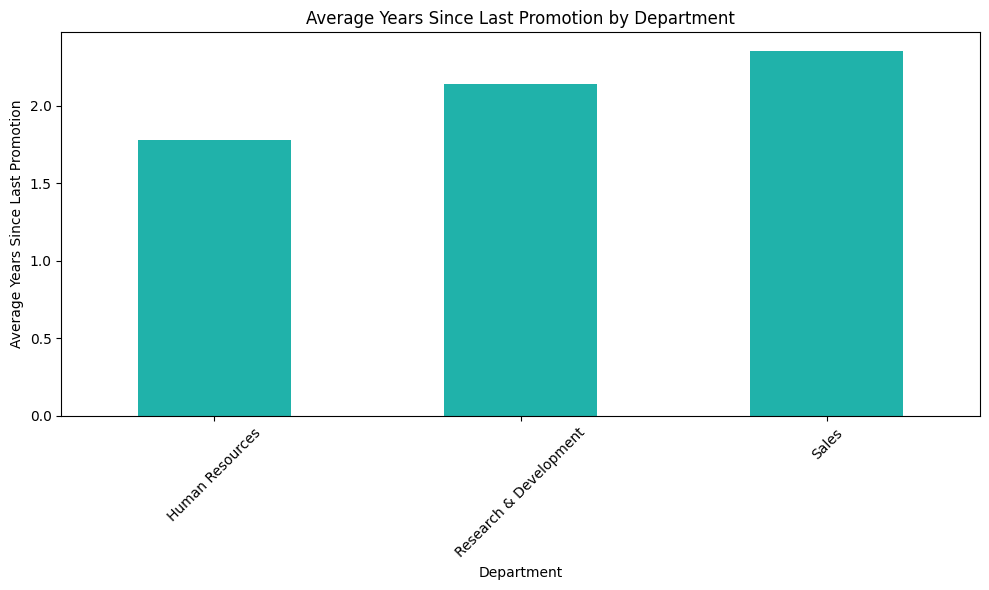

In [113]:
# Compare years since last promotion by department
promotion_by_dept = prob1.groupby('department')['yearssincelastpromotion'].mean()

# Plotting average years since last promotion by department
promotion_by_dept.plot(kind='bar', figsize=(10, 6), color='lightseagreen')
plt.title('Average Years Since Last Promotion by Department')
plt.xlabel('Department')
plt.ylabel('Average Years Since Last Promotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sales are getting promoted less often than research and devlopment. 

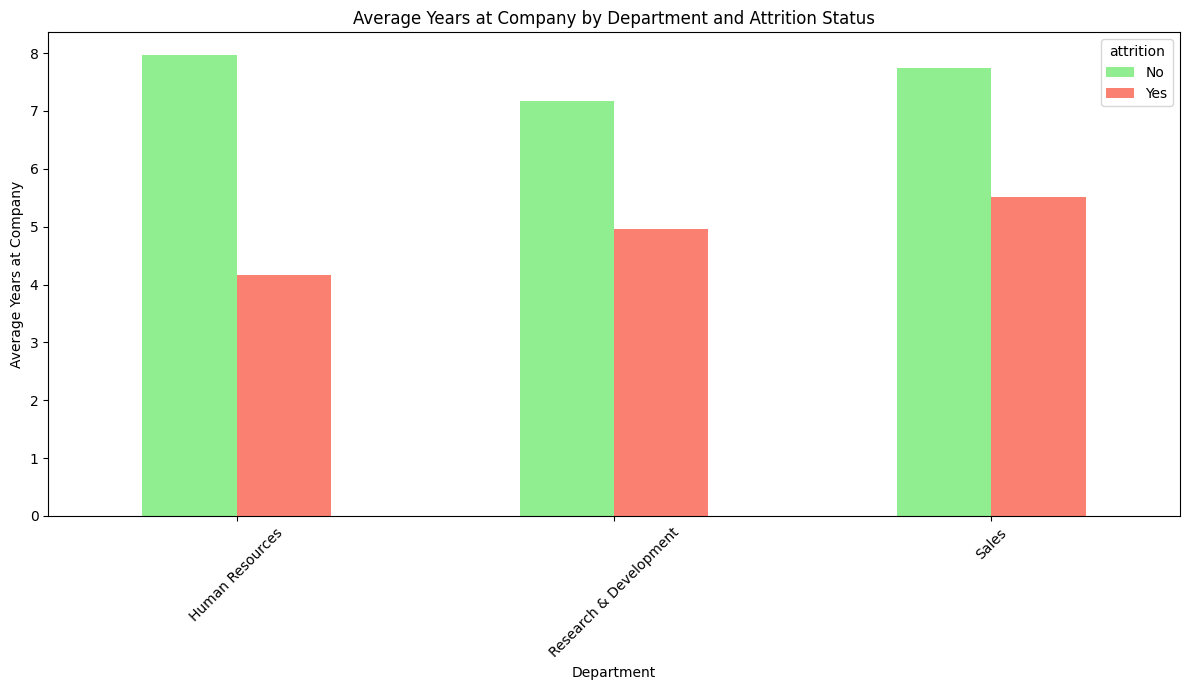

In [116]:
# 1. Years at Company and Attrition by Department
years_at_company_attrition_dept = prob1.groupby(['department', 'attrition'])['yearsatcompany'].mean().unstack()

# Plot the average years at company by department and attrition status
years_at_company_attrition_dept.plot(kind='bar', figsize=(12, 7), color=['lightgreen', 'salmon'])
plt.title('Average Years at Company by Department and Attrition Status')
plt.xlabel('Department')
plt.ylabel('Average Years at Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 - employees with fewer years at the company are more likely to leave (higher attrition rates)
 - This may be because they are at an  early stages of their career journey, where they are exploring opportunities or figuring out if the company culture aligns with their goals.
 - employees with longer tenure are often more settled in their roles and may have developed stronger relationships with colleagues and management so making them less likely to leave

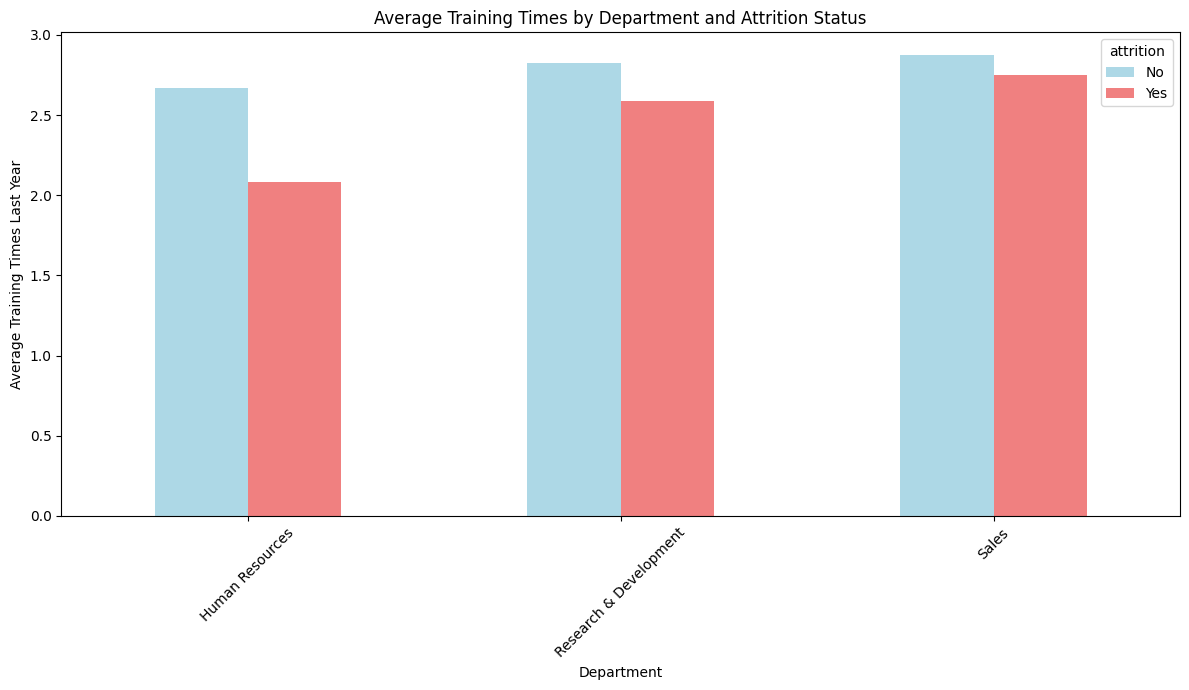

In [118]:
# Calculate average training times for employees in each department, separated by attrition status
training_by_dept_attrition = prob1.groupby(['department', 'attrition'])['trainingtimeslastyear'].mean().unstack()

# Plot the average training times by department and attrition status
training_by_dept_attrition.plot(kind='bar', figsize=(12, 7), color=['lightblue', 'lightcoral'])
plt.title('Average Training Times by Department and Attrition Status')
plt.xlabel('Department')
plt.ylabel('Average Training Times Last Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

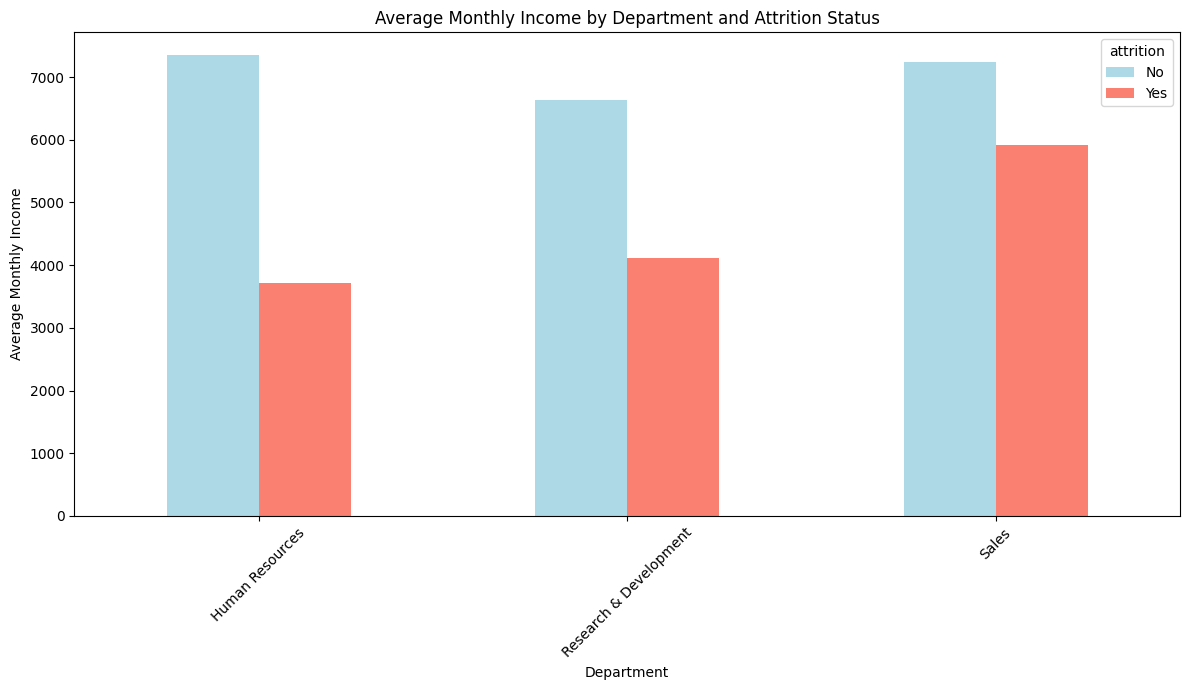

In [120]:

# Comparing the average monthly income between employees who left and stayed, by department
monthly_income_attrition_dept = prob1.groupby(['department', 'attrition'])['monthlyincome'].mean().unstack()
monthly_income_attrition_dept.plot(kind='bar', figsize=(12, 7), color=['lightblue', 'salmon'])
plt.title('Average Monthly Income by Department and Attrition Status')
plt.xlabel('Department')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Is the work environment in HR more stressful?
- Are employees in Sales facing more pressure or burnout?
- Are R&D employees more satisfied with career growth opportunities, which leads to a lower attrition rate?

## Coefficent Matrix

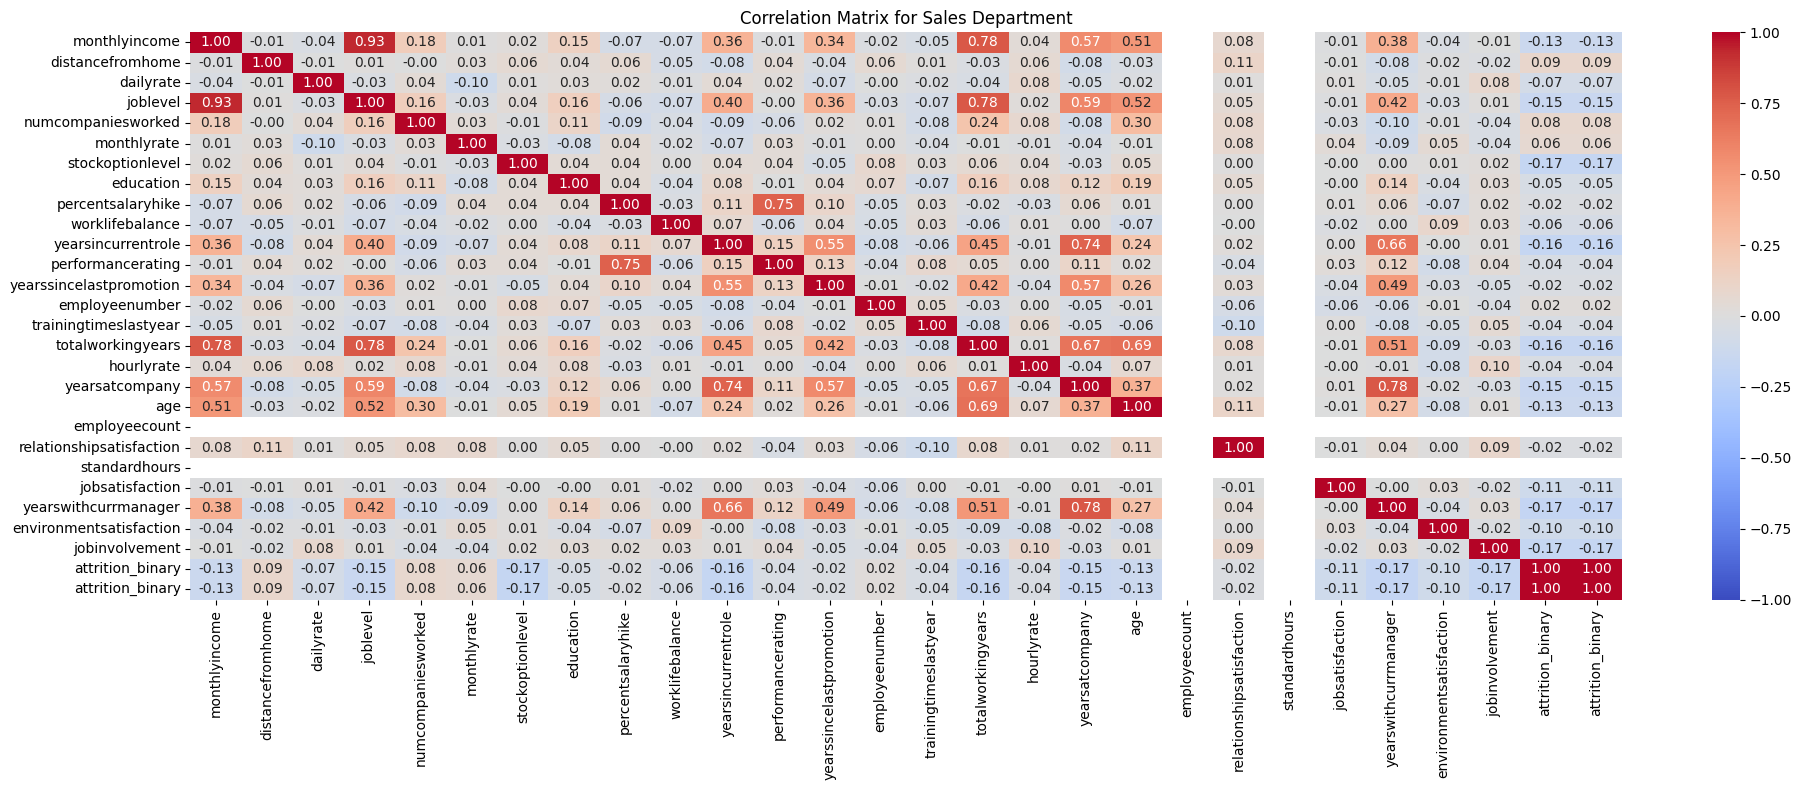

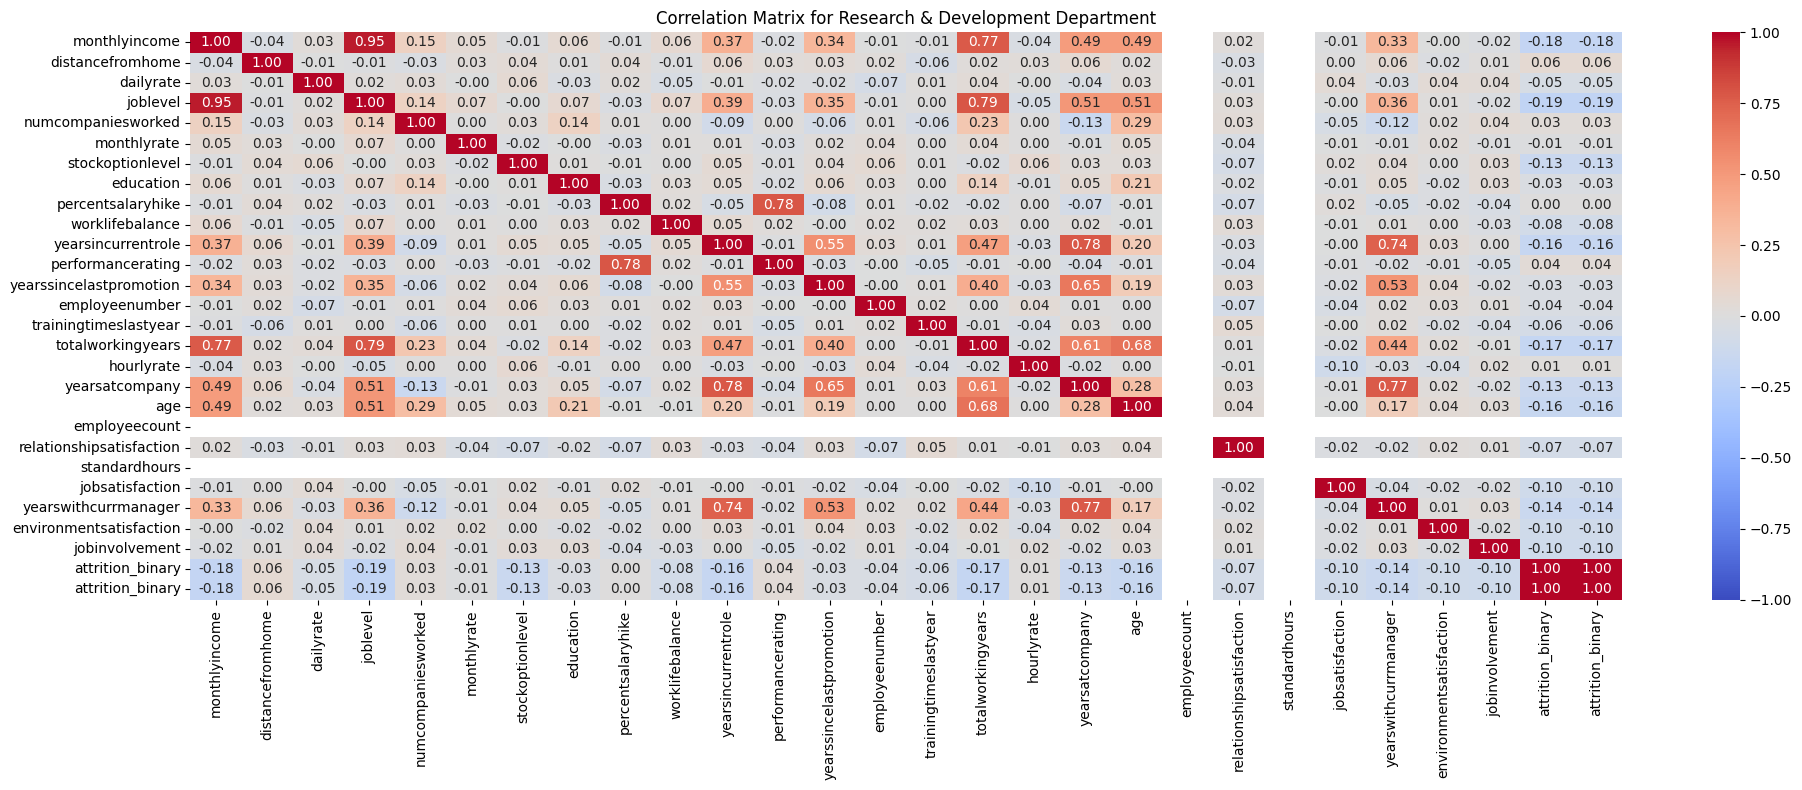

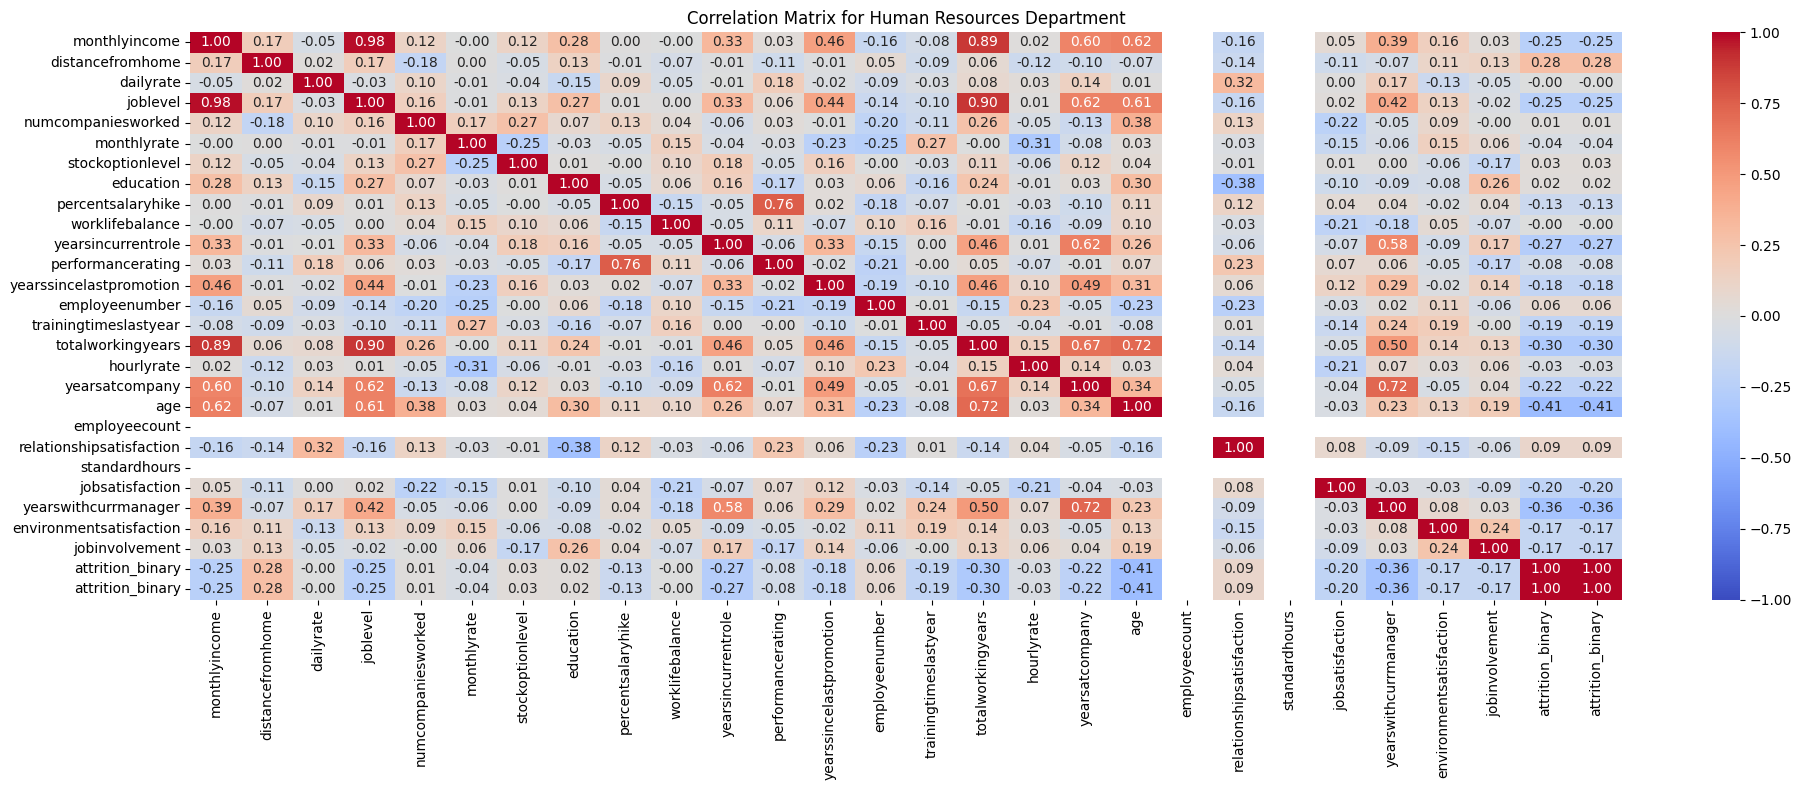

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

numeric_cols = prob1.select_dtypes(include=['int64', 'float64']).columns.tolist()
prob1['attrition_binary'] = prob1['attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

scaler = MinMaxScaler()
prob1[numeric_cols] = scaler.fit_transform(prob1[numeric_cols])

correlation_matrices = {}
for dept in prob1['department'].unique():
    dept_data = prob1[prob1['department'] == dept]
#
    corr_matrix = dept_data[numeric_cols + ['attrition_binary']].corr()
    correlation_matrices[dept] = corr_matrix
    plt.figure(figsize=(20, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for {dept} Department')
    plt.tight_layout()
    plt.show()




- Research and developemnt shows a negative correlation with monthly income ,years in current role , total working years, age ,joblevel.
- This means factors such as higher salary, employees who stay longer in their current role and have more working experience are less likely to leave.
- the previous box plot also suggested that R&D has more older employees - these may be more stable and experienced in their field (more senior roles) which leads to less attrition rate.

#### Comparing to HR and Sales ( similar but weeker correlation)
- Hr shows a strong negative correlation of -0.41 with suggests that (backed up by previous boxplot) that it has a lot of younger employees who have worked less in the company (-0.31) at a lower job level(-0.25) and less monthly income , working less with current manager (-0.36).
- Similar correlations for sales with other factors such as less job involvent + lesser training oppurtunities.


# Conclusion 
- Overall, the findings suggest that employee stability in terms of salary, tenure, experience, and seniority play crucial roles in reducing attrition, particularly in departments like R&D. In contrast, departments like HR and Sales, which have younger employees with less experience and lower job levels, exhibit higher attrition rates. Targeted retention strategies that focus on career development, mentorship, and training could be effective in improving retention across these departments.